<a href="https://colab.research.google.com/github/mariomendesjr/mj_data_science/blob/main/Data_Analysis_for_Airbnb_(Lisboa%2C_Portugal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **This is a project inspired by:**
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

##### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Data Analysis from Airbnb - *Lisbon, Portugal*

For most of opinions, [Airbnb](https://www.airbnb.com.br/) can be considered the **largest hotel company today**. But, the very peculiar thing is: **they have no hotel properties**!

Connecting people who want to travel (and have a place for resting) with hosts who want to rent their properties in a practical way, Airbnb provides an innovative platform to make this accommodation an alternative.

At the end of 2018, with its 10 years of existence, this startup had **hosted over 300 million** guests around the world, disrupting and bringin challenging to traditional hotel chains.

With a huge amount of information, one of Airbnb's initiatives is to provide its own data in a website, for some of the world's big cities. Accessing the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) portal, it is possible to download a large volume of data and use it to create *Data Science* analysis, projects and solutions.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**In this *notebook*, we will analyze data from the city of Lisbon in Portugal, and see what insights can be extracted from raw data.**

## Getting the Working Data

All data used was obtained from the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) website.

For this initial exploratory analysis, only the following file will be downloaded:

* `listings.csv` - *Summary information and metrics for listings in Lisbon (good for visualisations).*

In [2]:
# importing the main packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importing the CSV file listings.csv to a DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2020-12-20/visualisations/listings.csv")

## Data Analysis

At this point, we want to validate how data is structured and create our summary of variables (column names).

Let's check our *dataset* and analyzing its first 5 records.

In [4]:
# show first 5 records from the dataframe
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,79,3,26,2020-01-03,0.34,1,355
1,25659,Heart of Alfama - Coeur d'Alfama - Lisbon Center,107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,50,3,113,2019-12-08,1.39,1,363
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,42,3,324,2020-11-01,2.67,1,348
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,36,2,260,2020-12-14,2.49,2,327
4,29915,Modern and Cool Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.74712,-9.15286,Entire home/apt,48,5,39,2020-12-17,0.31,1,270


**Summary of variables (column names)**

* `id` - id number that identifies the property
* `name` - name of the advertised property
* `host_id` - id number of the property owner (host)
* `host_name` - Host name
* `neighbourhood_group` - this column does not contain any valid value
* `neighbourhood` - name of the neighborhood
* `latitude` - coordinates for the property's latitude
* `longitude` - coordinates for the property's longitude
* `room_type` - type of the listed room
* `price` - price to rent the property or room
* `minimum_nights` - minimum amount of nights to book
* `number_of_reviews` - number of reviews the property has
* `last_review` - date of the last review
* `reviews_per_month` - number of reviews per month
* `calculated_host_listings_count` - number of properties from the same host
* `availability_365` - number of available days on the last 365 days

### **Q1. How many attributes (variables) and how many records does our dataset have? What are the datatypes of variables?**

Let's check the number of records our dataset has and see the datatypes of each column.

This `listings.csv` dataset we downloaded from Airbnb is the "shortest" available version. In the same website, you can find a full version with more records and columns (`listings.csv.gz`).

In [5]:
# identify how big is the DataFrame
print("Records:\t {}".format(df.shape[0]))
print("Columns:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Records:	 20141
Columns:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Percentage of missing values in the *dataset*?**

The quality of a *dataset* is directly related to the amount of missing values. Therefore, it's important to understand earlier on whether these *null* values are relevant compared to the total records.

In [6]:
# sorting variables in descending order by their missing values (null)
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.174470
last_review                       0.174470
name                              0.000496
host_name                         0.000050
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

####Note
* We can see most of the columns have no missing values.
* The `reviews_per_month` and` last_review` have around 20% of the null values.
* The `name` and` host_name` variables have nearly to 0.05% and 0.005%, respectively, of the null values.

### **Q3. What is the statistical distribution type for each variables?**

To define the statiscal distribution of each variable, let's plot the histogram.

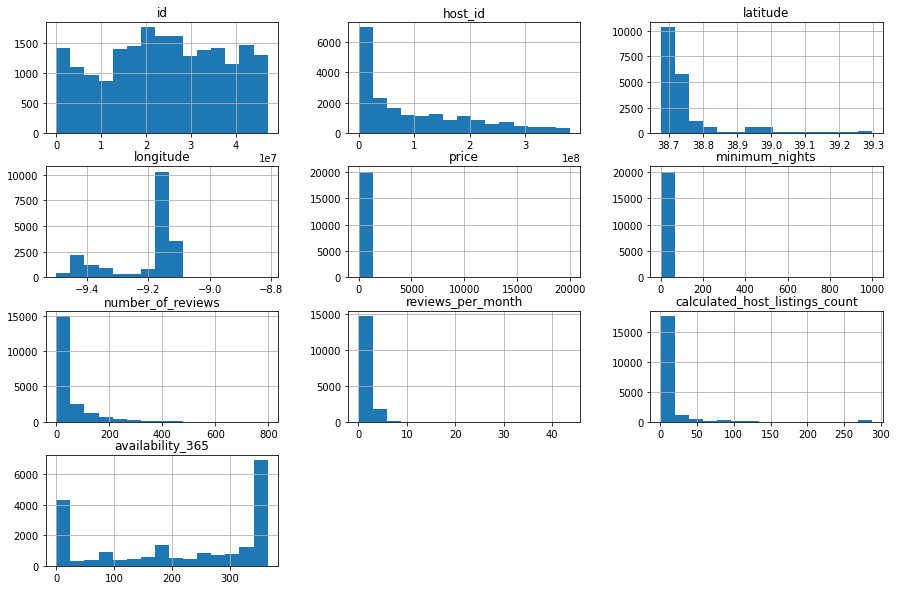

In [7]:
# plotting the histogram fo the numerical variables
df.hist(bins=15, figsize=(15,10));

### **Q4. Is there any outliers?**

Looking to the histogram, it's possible to see some [*outliers*](https://en.wikipedia.org/wiki/Outlier). Take for example the variables `price`, `minimum_nights` and `calculated_host_listings_count`.

The values do not follow the distribution, and distort the entire graphic representation. To confirm that, there are two quick ways to help detect *outliers*:

* Statistical summary using the `describe ()` method
* Plot `boxplots` for the variables.

In [8]:
# show the statistical summary of numerical variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20141.000000,20141.000000,20141.000000,16627.000000,20141.000000,20141.000000
mean,103.149695,3.703689,43.260911,1.227901,13.577826,214.359913
std,332.983121,18.163081,68.297796,1.328587,37.528400,143.068871
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,45.000000,1.000000,2.000000,0.260000,1.000000,76.000000
50%,66.000000,2.000000,13.000000,0.780000,3.000000,262.000000
75%,100.000000,3.000000,56.000000,1.830000,10.000000,356.000000
max,19988.000000,1000.000000,797.000000,43.640000,288.000000,365.000000


On the statistical summary above, we can see some hypotheses such as:

* The `price` variable has 75% of the value under the 100€, but its maximum value is 19988€ for a night.
* There are values for minimum number of nights (`minimum_nights`) over 365 days a year.

#### Boxplot for price

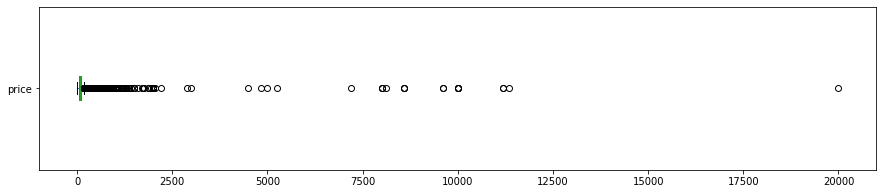

price: values over 2500€
24 records
0.1192%


In [9]:
# price
df.price.plot(kind="box", vert=False, figsize=(15, 3))
plt.show()

# show values above 2500€
print("price: values over 2500€")
print("{} records".format(len(df[df.price > 2500])))
print("{:.4f}%".format((len(df[df.price > 2500]) / df.shape[0])*100))

#### Boxplot for minimum_nights

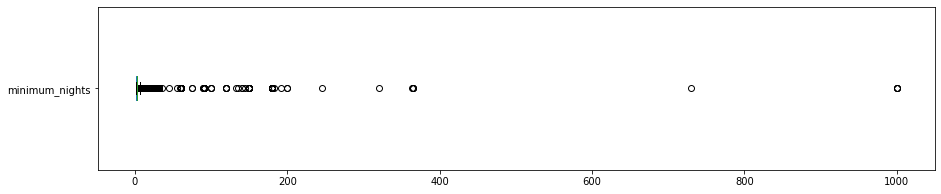

minimum_nights: values over 28 days (max by Airbnb default)
18143 records
90.0799%


In [10]:
# minimum_nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(15, 3))
plt.show()

# show values above 28 days
print("minimum_nights: values over 28 days (max by Airbnb default)")
print("{} records".format(len(df[df.price > 28])))
print("{:.4f}%".format((len(df[df.price > 28]) / df.shape[0])*100))

#### Histograms with no *outliers*

Since we found *outliers* in the variables `price` and` minimum_nights`, we will now clear the *DataFrame* and plot the histogram again.

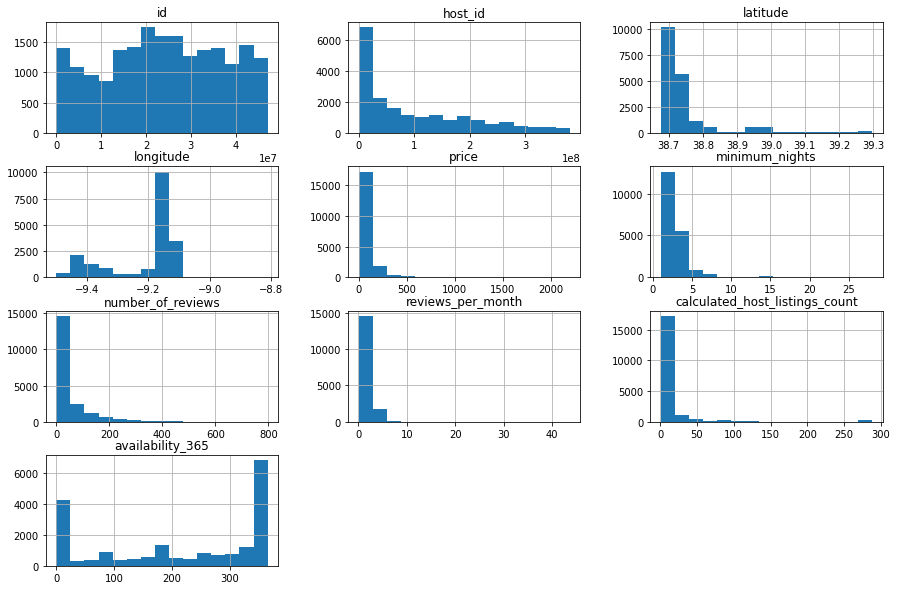

In [12]:
# removing the *outliers* into a new DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2500].index, axis = 0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 28].index, axis=0, inplace=True)

# plot the histogram for the numerical variables
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. What is the correlation between variables**

Correlation means that there is a relationship between two things. In our context, we are searching for a relationship or similarity between two variables.

The relationship can be measured, and it's the purpose of the correlation coefficient to define what's the intensity. To identify the correlations between the variables, let's:

* Create a correlation matrix
* Generate a *heatmap* from the matrix, using the `seaborn` library

In [13]:
# creating the correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# show the matrix
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.003369,-0.110328,-0.124099,0.002148,0.007246
minimum_nights,0.003369,1.000000,-0.039890,-0.097024,-0.051858,-0.038381
number_of_reviews,-0.110328,-0.039890,1.000000,0.793955,-0.087531,-0.016843
reviews_per_month,-0.124099,-0.097024,0.793955,1.000000,-0.091756,-0.021416
calculated_host_listings_count,0.002148,-0.051858,-0.087531,-0.091756,1.000000,0.045226
availability_365,0.007246,-0.038381,-0.016843,-0.021416,0.045226,1.000000


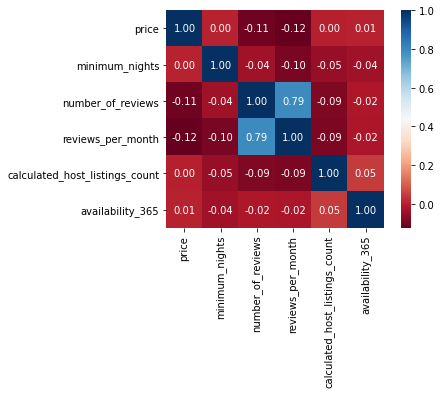

In [14]:
# plot the heatmap according to the correlation matrix
sns.heatmap(corr, cmap="RdBu", fmt=".2f", square=True, linecolor="white", annot=True);

### **Q6. What type of property is most rented on Airbnb?**

The column `room_type` shows the type of rental usually offered on Airbnb. When browsing through the website and listing the rents, we see options like renting the entire apartment/house, renting a room or even sharing a room with some other people.

Let's count the number of occurrences of each type of room, using the `value_counts()` method.

In [15]:
# showing the distinct available types of room
df_clean.room_type.value_counts()

Entire home/apt    14767
Private room        4248
Hotel room           420
Shared room          346
Name: room_type, dtype: int64

In [18]:
# showing the same, but in percentage
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.746524
Private room       0.214752
Hotel room         0.021232
Shared room        0.017492
Name: room_type, dtype: float64

### **Q7. What is the most expensive location in Lisbon?**

Let's check and compare neighborhoods (neighborhoods) by rent price, and find the expensivier rental place. For that, we'll use the groupby () method.

In [23]:
# the prices average by neighborhood
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Azambuja                                    317.500000
Freiria                                     290.000000
Cardosas                                    280.000000
Ota                                         249.000000
Vermelha                                    242.500000
Alguber                                     220.000000
Alhandra, So Joo dos Montes e Calhandriz    218.888889
Aveiras de Baixo                            213.000000
Vale do Paraso                              201.000000
Alcabideche                                 184.596774
Name: price, dtype: float64

By the result above, neighbourhoods like Azambuja, Freiria, Cardosas, Ota, Vermelha and so on, they have the average price higher than places like Santo António, Santa Maria Maior, Misericórdia, also Cascais and Estoril.

For someone with no information from Lisbon, this result can lead a misunderstanding or even a wrong indicator for a rental. For example, let's check how many records the dataset has for Azambuja.

In [27]:
# number os available rooms in Azambuja
print(df_clean[df_clean.neighbourhood == "Azambuja"].shape)

df_clean[df_clean.neighbourhood == "Azambuja"]

(2, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4703,13403420,"Great villa near Ericeira swimming pool, jacuzzi",62121230,Lina,Torres Vedras,Freiria,39.03564,-9.34570,Entire home/apt,520,3,7,2020-08-21,0.19,1,360
13696,32125496,Casa Freiria Tour,241022718,Natalia,Torres Vedras,Freiria,39.02471,-9.31984,Entire home/apt,60,2,3,2020-08-23,0.19,1,365


That's an example on how a sample can be non-representative when just validating an indicator out of the context.

Now, as the dataset provides the latitudes and longitudes for each property, let's plot each placement and visualize how they are located according to their price. Let's define `x = longitude` and` y = latitude`.

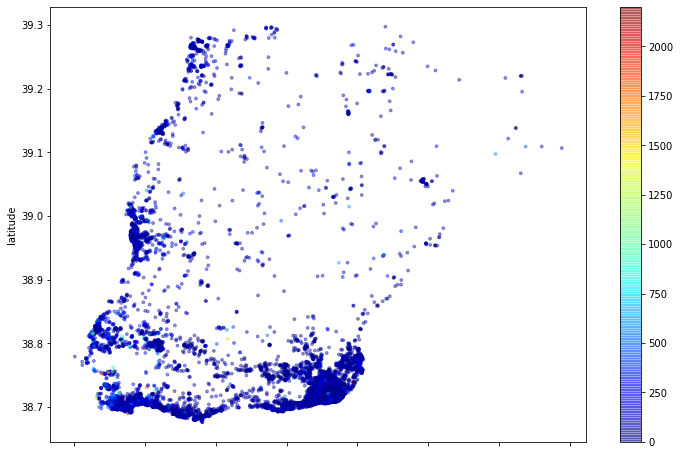

In [26]:
# plot properties location by latitude-longitude
df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c=df_clean["price"], s=8, cmap=plt.get_cmap("jet"), figsize=(12,8));

## Final thoughts

This is a personal project where I meant to apply and practice some Data Science theories, analysis and processes. Therefore, it was just superficial analysis was done in the Airbnb database. Even so, it was possible to identify outliers for some variables.

Also, note that for some locations there are few properties available, which can distort the information when evaluating some attributes.

Concluding, remember this is an analysis done from short version of the data set, idealy only for an initial approach. In case of a further and more accurate exploratory analysis, I strongly recommend to use the complete and more detailed data set, `listings.csv.gz`, where it's possible to find  more detailed data.